In [1]:
import mavenn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

2024-08-08 10:34:54.515347: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-08 10:34:54.557032: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-08 10:34:55.190533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Choose dataset
dataset_name = 'Rhla'
print(f"dataset '{dataset_name}' ")

# Load dataset
data_df=pd.read_csv("/home/Lxc/mavenn/mavenn/examples/datasets/Rhla_sum5a.csv")

# Get and report sequence length
L = len(data_df.loc[0,'x'])
print(f"Sequence length: {L:d} amino acids (+ stops)")
        
# Preview dataset
print('data_df:')
data_df

dataset 'Rhla' 
Sequence length: 295 amino acids (+ stops)
data_df:


,x,log_fitness,n_mut,mutant
0,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.736872,1,A101M
1,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.205111,1,H177F
2,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.110596,1,Q176K
3,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.955126,1,S173K
4,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.942674,1,Q176R
...,...,...,...,...
2940,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASQART...,0.684120,6,F43Q;Q73N;R74Q;A101M;Q143R;S173L
2941,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASQART...,0.731748,6,F43Q;Q73G;R74C;A101M;Q143R;S173L
2942,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASQART...,1.972945,6,F43Q;Q73G;R74C;A101M;L148I;S173R
2943,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASWART...,1.413634,6,F43W;Q73N;R74P;A101I;L148I;S173R


In [3]:
np.random.seed(0)

data_df['set'] = np.where(data_df['n_mut'] > 1, 'test', 'unassigned')

remaining_data = data_df[data_df['set'] != 'test']

remaining_data['set'] = np.random.choice(['training', 'validation'], 
                                         p=[0.95, 0.05], 
                                         size=len(remaining_data))
data_df.loc[remaining_data.index, 'set'] = remaining_data['set']

data_df
#remaining_data['set']
#len(remaining_data)

,x,log_fitness,n_mut,mutant,set
0,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.736872,1,A101M,training
1,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.205111,1,H177F,training
2,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.110596,1,Q176K,training
3,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.955126,1,S173K,training
4,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.942674,1,Q176R,training
...,...,...,...,...,...
2940,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASQART...,0.684120,6,F43Q;Q73N;R74Q;A101M;Q143R;S173L,test
2941,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASQART...,0.731748,6,F43Q;Q73G;R74C;A101M;Q143R;S173L,test
2942,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASQART...,1.972945,6,F43Q;Q73G;R74C;A101M;L148I;S173R,test
2943,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASWART...,1.413634,6,F43W;Q73N;R74P;A101I;L148I;S173R,test


In [4]:
# Split dataset
trainval_df, test_df = mavenn.split_dataset(data_df)

# Preview trainval_df
print('trainval_df:')
trainval_df

Training set   :       28 observations (   0.95%)
Validation set :        2 observations (   0.07%)
Test set       :    2,915 observations (  98.98%)
-------------------------------------------------
Total dataset  :    2,945 observations ( 100.00%)

trainval_df:


,validation,x,log_fitness,n_mut,mutant
0,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.736872,1,A101M
1,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.205111,1,H177F
2,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,1.110596,1,Q176K
3,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.955126,1,S173K
4,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.942674,1,Q176R
5,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.918348,1,R74T
6,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.900185,1,R74Q
7,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.897775,1,H177Y
8,True,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.820931,1,R74L
9,False,MRRESLLVSVCKGLRVHVERVGQDPGRSTVMLVNGAMATTASFART...,0.811313,1,S173R


In [5]:
# Define model
model = mavenn.Model(L=L,alphabet='protein*',gpmap_type='blackbox',regression_type='GE',ge_noise_model_type='SkewedT',ge_heteroskedasticity_order=2)
if not (data_df[data_df['set'] == 'training']['n_mut'] > 1).sum():
    model.ge_nonlinearity_type = 'linear'
    model.gpmap_type = 'additive'
    print('only single mutant')


#model.ge_nonlinearity_type = 'linear'
#model.gpmap_type = 'additive'

2024-08-08 10:34:57.305240: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 853 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:8a:00.0, compute capability: 8.9


only single mutant


In [6]:
# Set training data
model.set_data(x=trainval_df['x'],y=trainval_df['log_fitness'],validation_flags=trainval_df['validation'])

N = 30 observations set as training data.
Using 6.7% for validation.
Data shuffled.
Time to set data: 0.0197 sec.


In [7]:
# Train model
model.fit(learning_rate=1e-3,epochs=500,batch_size=64,early_stopping=True,early_stopping_patience=25,verbose=False)

2024-08-08 10:35:00.310609: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


Training time: 35.8 seconds


In [8]:
# Compute variational information
I_var, dI_var =  model.I_variational(x=test_df['x'], y=test_df['log_fitness'])
print(f'test_I_var: {I_var:.3f} +- {dI_var:.3f} bits')

I_var, dI_var =  model.I_variational(x=trainval_df['x'], y=trainval_df['log_fitness'])
print(f'trainval_I_var: {I_var:.3f} +- {dI_var:.3f} bits')

# Compute predictive information on trainval data
I_pred, dI_pred = model.I_predictive(x=test_df['x'], y=test_df['log_fitness'])
print(f'test_I_pred: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_pred, dI_pred = model.I_predictive(x=trainval_df['x'], y=trainval_df['log_fitness'])
print(f'trainval_I_pred: {I_pred:.3f} +- {dI_pred:.3f} bits')

test_I_var: -9.405 +- 0.180 bits
trainval_I_var: 1.404 +- 0.228 bits
test_I_pred: 0.082 +- 0.015 bits
trainval_I_pred: 0.517 +- 0.049 bits


In [9]:
# Save model to file
import os
model_name = f'{dataset_name}_SUM_5A_blackbox_ge_trainval95-5'
model_path = os.path.join('/home/Lxc/mavenn/mavenn/examples/models/', model_name)
model.save(model_path)

Model saved to these files:
	/home/Lxc/mavenn/mavenn/examples/models/Rhla_SUM_5A_blackbox_ge_trainval95-5.pickle
	/home/Lxc/mavenn/mavenn/examples/models/Rhla_SUM_5A_blackbox_ge_trainval95-5.h5


In [10]:
# Show metrics recorded in model.history()
model.history.keys()

dict_keys(['loss', 'I_var', 'val_loss', 'val_I_var'])

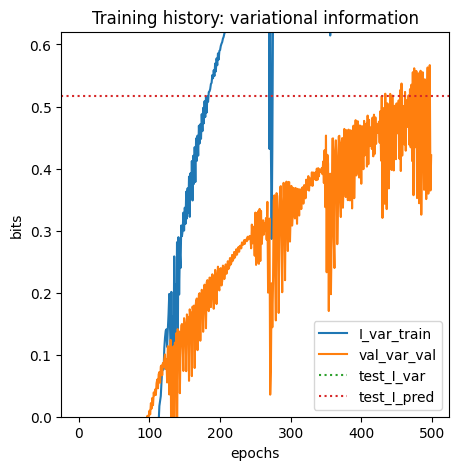

In [11]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[5,5])

# Plot I_var_train, the variational information on training data as a function of epoch
ax.plot(model.history['I_var'],label=r'I_var_train')

# Plot I_var_val, the variational information on validation data as a function of epoch
ax.plot(model.history['val_I_var'],label=r'val_var_val')

# Show I_var_test, the variational information of the final model on test data
ax.axhline(I_var, color='C2', linestyle=':',label=r'test_I_var')

# Show I_pred_test, the predictive information of the final model on test data
ax.axhline(I_pred, color='C3', linestyle=':',label=r'test_I_pred')

# Style plot
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('Training history: variational information')
ax.set_ylim([0, 1.2*I_pred])
ax.legend()

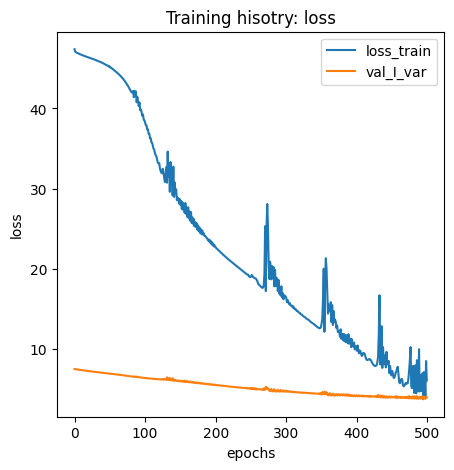

In [12]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[5,5])

# Plot loss_train, the loss computed on training data as a function of epoch
ax.plot(model.history['loss'],
label=r'loss_train')

# Plot loss_val, the loss computed on validation data as a function of epoch
ax.plot(model.history['val_loss'],
label=r'val_I_var')

# Style plot
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_title('Training hisotry: loss')
ax.legend()

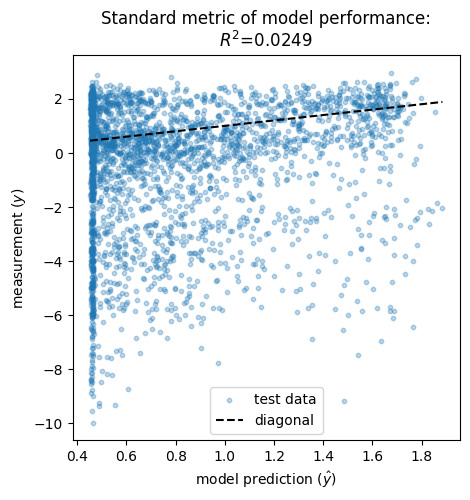

In [13]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[5,5])

# Get test data y values
y_test = test_df['log_fitness']

# Compute yhat on test data
yhat_test = model.x_to_yhat(test_df['x'])

# Compute R^2 between yhat_test and y_test
Rsq = np.corrcoef(yhat_test.ravel(), test_df['log_fitness'])[0, 1]**2

# Plot y_test vs. yhat_test
ax.scatter(yhat_test, y_test, color='C0', s=10, alpha=.3,
label='test data')

# Style plot
xlim = [min(yhat_test), max(yhat_test)]
ax.plot(xlim, xlim, '--', color='k', label='diagonal', zorder=100)
ax.set_xlabel('model prediction ($\hat{y}$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title(f'Standard metric of model performance:\n$R^2$={Rsq:.3}');
ax.legend()

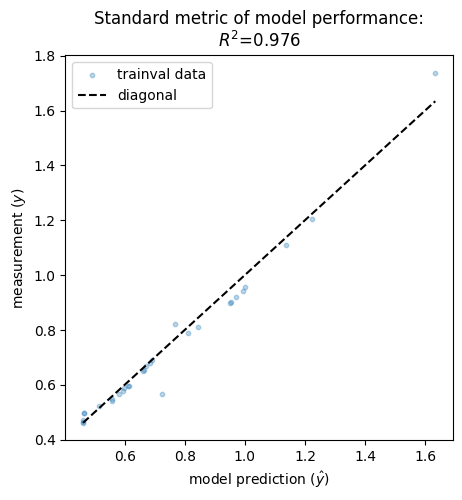

In [14]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[5,5])

# Get trainval data y values
y_trainval = trainval_df['log_fitness']

# Compute yhat on trainval data
yhat_trainval = model.x_to_yhat(trainval_df['x'])

# Compute R^2 between yhat_trainval and y_trainval
Rsq = np.corrcoef(yhat_trainval.ravel(), trainval_df['log_fitness'])[0, 1]**2

# Plot y_trainval vs. yhat_trainval
ax.scatter(yhat_trainval, y_trainval, color='C0', s=10, alpha=.3,
label='trainval data')

# Style plot
xlim = [min(yhat_trainval), max(yhat_trainval)]
ax.plot(xlim, xlim, '--', color='k', label='diagonal', zorder=100)
ax.set_xlabel('model prediction ($\hat{y}$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title(f'Standard metric of model performance:\n$R^2$={Rsq:.3}');
ax.legend()

In [15]:
print('yhat_test:')
yhat_test

yhat_test:


array([0.5822628, 0.5163676, 0.4647854, ..., 1.1914798, 0.9747026,
       1.3199399], dtype=float32)

In [16]:
print('y_test:')
y_test

y_test:


0      -0.239860
1       0.679854
2       0.535735
3       0.629828
4       0.231024
          ...   
2910    0.684120
2911    0.731748
2912    1.972945
2913    1.413634
2914    1.434596
Name: log_fitness, Length: 2915, dtype: float64

In [17]:
# Assemble into dataframe
final_df = pd.DataFrame({'yhat_test':yhat_test, 'y_test':y_test})

# Save to file
final_df.to_csv('/home/Lxc/mavenn/mavenn/examples/results/Rhla_sum5a_blackbox_ge_1vs2-6.csv', index=True)

# Preview dataframe
final_df

,yhat_test,y_test
0,0.582263,-0.239860
1,0.516368,0.679854
2,0.464785,0.535735
3,0.512411,0.629828
4,0.476099,0.231024
...,...,...
2910,1.408422,0.684120
2911,0.990544,0.731748
2912,1.191480,1.972945
2913,0.974703,1.413634


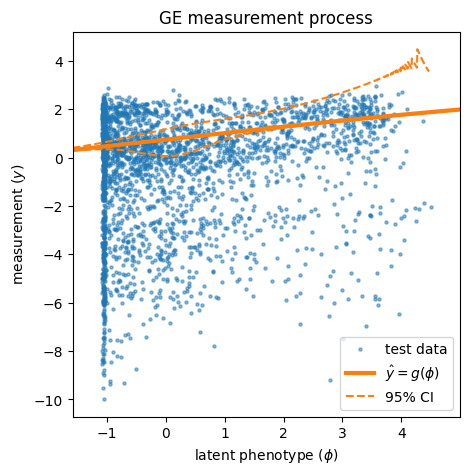

In [18]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[5,5])

# Get test data y values
 #ax = axs[0]
y_test = test_df['log_fitness']

# Compute φ on data
phi_test = model.x_to_phi(test_df['x'])
 #phi_wt_full = model.x_to_phi(wt_seq)
 #yhat_wt_full = model.x_to_yhat(wt_seq)

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plot scatter of φ and y values,
ax.scatter(phi_test, y_test,color='C0', s=5, alpha=.5, label='test data', rasterized=True)

# Plot GE nonlinearity
ax.plot(phi_grid, yhat_grid,linewidth=3, color='C1', label='$\hat{y} = g(\phi)$')

# Plote 95% confidence interval
 #ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],alpha=0.3, color='C1', lw=0, label='95% CI')

ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='95% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
 #ax.axvline(phi_wt_full, color='gray', zorder=200, label='WT $\phi$')

# Style plot
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('GE measurement process')
ax.legend()

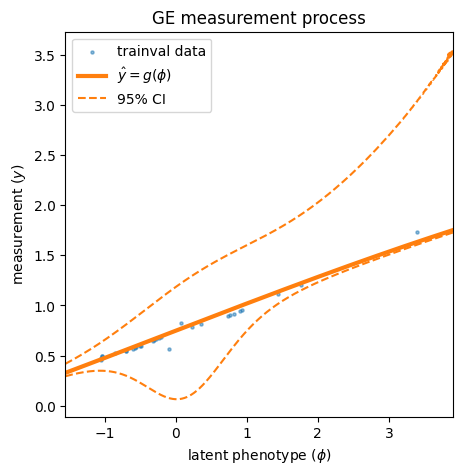

In [19]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1,1,figsize=[5,5])

# Get trainval data y values
#ax = axs[0]
y_trainval = trainval_df['log_fitness']

# Compute φ on data
phi_trainval = model.x_to_phi(trainval_df['x'])
#phi_wt_full = model.x_to_phi(wt_seq)
#yhat_wt_full = model.x_to_yhat(wt_seq)

## Set phi lims and create a grid in phi space
phi_lim = [min(phi_trainval)-.5, max(phi_trainval)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 95% CI for each yhat
q = [0.025, 0.975]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Plot scatter of φ and y values,
ax.scatter(phi_trainval, y_trainval,color='C0', s=5, alpha=.5, label='trainval data', rasterized=True)

# Plot GE nonlinearity
ax.plot(phi_grid, yhat_grid,linewidth=3, color='C1', label='$\hat{y} = g(\phi)$')

# Plote 95% confidence interval
#ax.fill_between(phi_grid, yqs_grid[:, 0], yqs_grid[:, 1],alpha=0.3, color='C1', lw=0, label='95% CI')

ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='95% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
#ax.axvline(phi_wt_full, color='gray', zorder=200, label='WT $\phi$')

# Style plot
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('GE measurement process')
ax.legend()

In [20]:
# Retrieve G-P map parameter dict and view dict keys
#theta_dict = model.x_to_phi_layer.get_params()
theta_dict = model.get_theta(gauge='consensus')
theta_dict.keys()

TypeError: get_params() got an unexpected keyword argument 'pop'

NameError: name 'theta_dict' is not defined

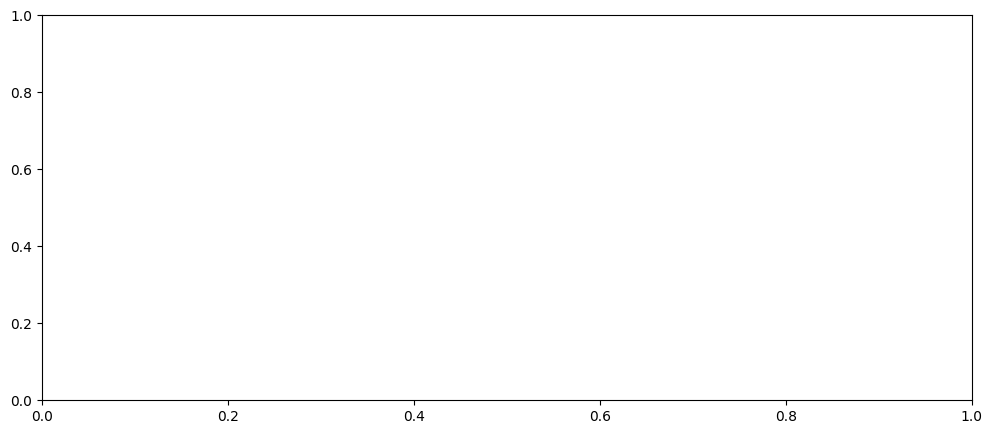

In [ ]:
# Create figure
fig, ax = plt.subplots(1,1, figsize=(12,5))

# Draw heatmap
heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_dict['theta_lc'],
                                alphabet=theta_dict['alphabet'],
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'gray', 's':25},
                                cmap='coolwarm',
                                cbar=True,
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: {model_name}')

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)